In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
pd.options.display.max_rows = 999
import sys
sys.path.append('../src/')
from wodupscraper import wodup
import getpass

In [2]:
# Wodup login email & password
email = 'hasan.nagib@gmail.com'
password = getpass.getpass('Enter WodUP password:')

Enter WodUP password:········


## Initialize crawlers
This will let us log in WodUp and navigate to profile we want to crawl. 

In [3]:
wodup_dk = wodup(email, password, url='http://wodup.com/danielkim')
wodup_hn = wodup(email, password, url='http://wodup.com/hasannagib')

## Pull & clean logs

For each profile, pull data for the given movements

In [4]:
movements = ['front-squat', 'back-squat', 'deadlift', 'barbell-bench-press']

for wodup in [wodup_dk, wodup_hn]:
    for movement in movements:
        wodup.get_log(movement)
    wodup.clean_logs()

/Users/hasannagib/opt/anaconda3/envs/autowod/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1215: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,


In [5]:
wodup_hn.logs['back-squat'].head()

,date,reps,weights,reps_list,weights_list
0,2020-08-13,12-8-5-5-5,95 – 135 – 235 – 245 – 250 lbs,"[12, 8, 5, 5, 5]","[95, 135, 235, 245, 250]"
1,2020-07-04,8 x 5,95 – 135 – 185 – 235 – 235 – 235 – 235 – 235 lbs,"[5, 5, 5, 5, 5, 5, 5, 5]","[95, 135, 185, 235, 235, 235, 235, 235]"
2,2020-06-28,5-4-3-2-1-1-1-1-1,95 – 135 – 185 – 225 – 255 – 275 – 295 – 295 –...,"[5, 4, 3, 2, 1, 1, 1, 1, 1]","[95, 135, 185, 225, 255, 275, 295, 295, 295]"
3,2020-06-09,5-5-5-5-3-1-1-1-0-0,45 – 95 – 135 – 185 – 225 – 245 – 275 – 285 lbs,"[5, 5, 5, 5, 3, 1, 1, 1]","[45, 95, 135, 185, 225, 245, 275, 285]"
4,2020-04-05,8-8-7-6-5-4-3-2-1-1-1-1-,45 – 95 – 115 – 135 – 155 – 185 – 225 – 235 – ...,"[8, 8, 7, 6, 5, 4, 3, 2, 1, 1, 1, 1]","[45, 95, 115, 135, 155, 185, 225, 235, 245, 25..."


## Flatten logs

The `gen_hist()` method will flatten the logs dataframe. This will be the input for lift plots.

In [6]:
wodup_hn.gen_hist('back-squat').head(10)

,date,weights,reps
0,2020-08-13,95,12
1,2020-08-13,135,8
2,2020-08-13,235,5
3,2020-08-13,245,5
4,2020-08-13,250,5
5,2020-07-04,95,5
6,2020-07-04,135,5
7,2020-07-04,185,5
8,2020-07-04,235,5
9,2020-07-04,235,5


## Visualize lift data

In [7]:
def plot_hist(movement, rep_range, max_to_date=True):
    plt.figure(figsize=(10,6))
    for wodup in [wodup_dk, wodup_hn]:
        df_hist = wodup.gen_hist(movement)
        df_plot = df_hist.query(f'reps>={rep_range[0]} and reps<={rep_range[1]}').sort_values('date')
        if max_to_date:
            np.maximum.accumulate(df_plot).set_index('date')['weights'].plot(style='-');
        else:
            df_plot.set_index('date')['weights'].plot(style='-');
    plt.grid()
    movement_name = ' '.join([i.capitalize() for i in movement.split('-')])
    plt.ylabel(f'{movement_name} (lbs)')
    plt.legend(['DK Bro', 'Me'])

In [8]:
interact(
    plot_hist,
    movement=['back-squat', 'front-squat', 'deadlift', 'barbell-bench-press'],
    rep_range = widgets.IntRangeSlider(
        value=[1, 5], min=1, max=10, step=1,
        description='rep range:',
    )   
    
);

interactive(children=(Dropdown(description='movement', options=('back-squat', 'front-squat', 'deadlift', 'barb…

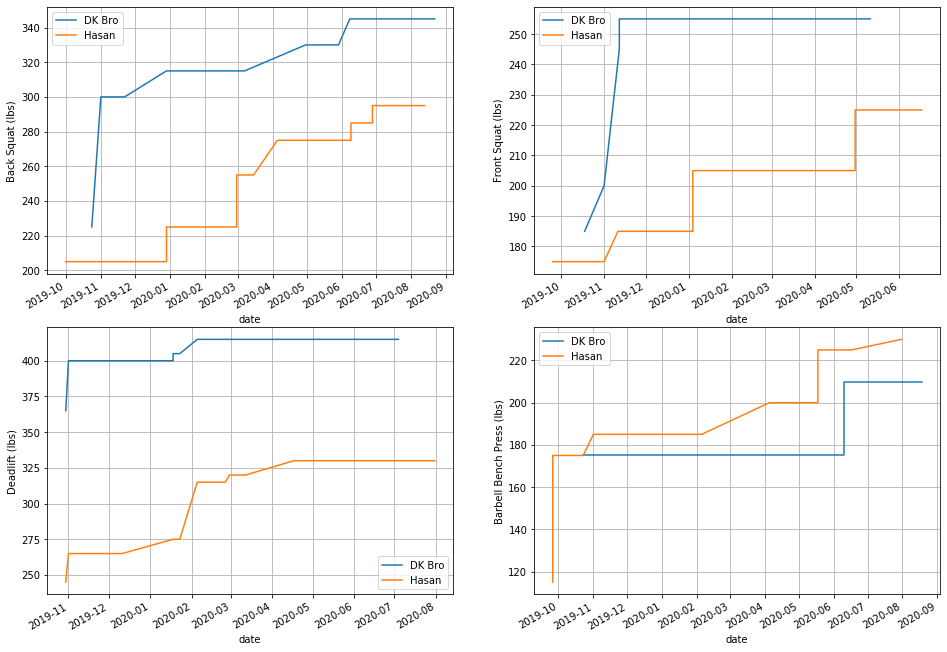

In [9]:
plt.figure(figsize=(16,12))

rep_range=(1,5)
max_to_date=True
for i, movement in enumerate(['back-squat', 'front-squat', 'deadlift', 'barbell-bench-press']):
    plt.subplot(2,2,i+1)
    for wodup in [wodup_dk, wodup_hn]:
        df_hist = wodup.gen_hist(movement)
        df_plot = df_hist.query(f'reps>={rep_range[0]} and reps<={rep_range[1]}').sort_values('date')
        if max_to_date:
            np.maximum.accumulate(df_plot).set_index('date')['weights'].plot(style='-');
        else:
            df_plot.set_index('date')['weights'].plot(style='-');
    plt.grid()
    movement_name = ' '.join([i.capitalize() for i in movement.split('-')])
    plt.ylabel(f'{movement_name} (lbs)')
    plt.legend(['DK Bro', 'Hasan'])